# **Quiz  on Conservation of Linear Momentum**

Consider the coupled spring mass system:

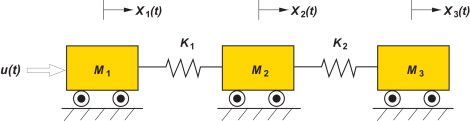

Appling Newton's equations for each of masses seperately,

\begin{align}
m_1\ddot{x}_1 = -k_1(x_1-x_2)\newline
m_2\ddot{x}_2 = -k_1(x_2-x_1) - k_1(x_2-x_3)\newline
m_3\ddot{x}_3 = -k_2(x_3-x_2)
\end{align}

Which can be written as:
\begin{align*}
M\ddot{X}+KX&=0
\end{align*}
where
\begin{align*}
X=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix},\:\:\:\:
M=\begin{bmatrix}m_1 & 0 &0 \\0 & m_2 & 0\\ 0 & 0 & m_3\end{bmatrix},\:\:\:\:
K=\begin{bmatrix}
k_1 & -k_1 & 0\\ -k_1 & (k_1+k_2) & -k_2\\ 0 & -k_2 & k_2
\end{bmatrix}
\end{align*}


This can also be written in the dynamic system form
\begin{align*}
\dot{Y}&=AY
\end{align*}
where
\begin{align*}
Y=\begin{bmatrix}x_1\\x_2\\x_3\\\dot{x}_1\\\dot{x}_2\\\dot{x}_3\end{bmatrix},\:\:\:\:
A=\begin{bmatrix}0 & 0 & 0 & 1 &0 & 0\\ 0 & 0& 0 & 0 & 1 & 0\\0&0&0&0&0&1\\-\frac{k_1}{m_1} & \frac{k_1}{m_1} & 0 & 0 & 0 &0 \\\frac{k_1}{m_2} & -\frac{k_1+k_2}{m_2} & \frac{k_2}{m_2} &0 &0&0\\ 0 & \frac{k_2}{m_3} & -\frac{k_2}{m_3} & 0 & 0 & 0
\end{bmatrix}.
\end{align*}

Let,

$m_1=m_2=m_3=m_3=k_1=k_2=1$

### **Solving Numerically**

In [26]:
import numpy as np
import plotly.graph_objects as go

In [27]:
def LinearSystemModel(X, t, A):
  dXdt=A @ X;
  return dXdt

In [28]:
import scipy as sp
from scipy.integrate import odeint
dT=0.1
S=50
A=[1,0,0,0,0,0]
sysPara=np.array([[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1],[-1,1,0,0,0,0],[1,-2, 1,0,0,0],[0,1,-1,0,0,0]])
t = np.linspace(0, S, int(S/dT+1))
sol = odeint(LinearSystemModel, A, t, args=(sysPara,));
soln=sol;
fig = go.Figure()
[nt,nS]=sol.shape;
print(int(S/dT+1))

# Add traces
for nn in range(nS-3):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines', name='x'+str(nn+1)))
            fig.update_layout(title="Simulation of the Displacements with t", xaxis=dict(title="Time"),yaxis=dict(title="Displacement"))


fig.show()

501
